In [16]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense
from keras.datasets import cifar100
import cv2

In [21]:
model = keras.datasets.cifar100
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar100.load_data()

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
#đưa toàn bộ giá trị điểm ảnh về khoảng 0 -> 1.
x=x_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
from tensorflow.keras.utils import to_categorical
from keras import metrics
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [24]:
from keras.models import Sequential
model = Sequential()

In [25]:
#tao lop
model.add(Dense(512,activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               5

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])

In [29]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_split = 0.2)

Epoch 1/50
313/313 [==============================] - 14s 43ms/step - loss: 0.0099 - acc: 0.0305 - val_loss: 0.0098 - val_acc: 0.0410
Epoch 2/50
313/313 [==============================] - 13s 42ms/step - loss: 0.0098 - acc: 0.0450 - val_loss: 0.0097 - val_acc: 0.0635
Epoch 3/50
313/313 [==============================] - 13s 42ms/step - loss: 0.0097 - acc: 0.0580 - val_loss: 0.0097 - val_acc: 0.0742
Epoch 4/50
313/313 [==============================] - 13s 42ms/step - loss: 0.0097 - acc: 0.0686 - val_loss: 0.0096 - val_acc: 0.0893
Epoch 5/50
313/313 [==============================] - 14s 45ms/step - loss: 0.0097 - acc: 0.0779 - val_loss: 0.0096 - val_acc: 0.0890
Epoch 6/50
313/313 [==============================] - 13s 43ms/step - loss: 0.0096 - acc: 0.0847 - val_loss: 0.0096 - val_acc: 0.1035
Epoch 7/50
313/313 [==============================] - 15s 48ms/step - loss: 0.0096 - acc: 0.0933 - val_loss: 0.0096 - val_acc: 0.1014
Epoch 8/50
313/313 [==============================] - 13s 42ms

In [30]:
model.save('Cifar100.h5')
from keras.models import load_model
model5 = load_model('Cifar100.h5')

In [31]:
#danh gia mo hinh tren tap test
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0093 - acc: 0.1624


[0.009279589168727398, 0.1624000072479248]

313/313 [==============================] - 3s 8ms/step - loss: 0.0093 - acc: 0.1624
Test loss =  0.009279589168727398
Test acuracy 0.1624000072479248


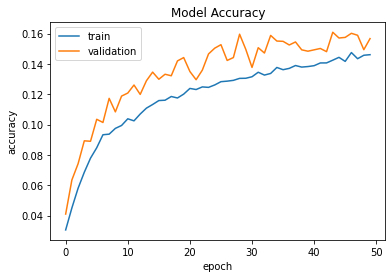

In [34]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss = ',score[0])
print('Test acuracy',score[1])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc ='upper left')

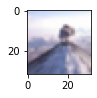

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


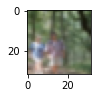

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


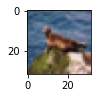

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


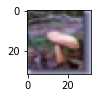

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


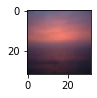

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


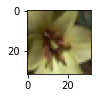

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


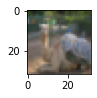

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


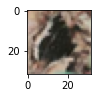

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


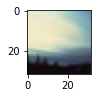

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [44]:
import numpy as np
Y_pred = model.predict(x_test)
for i in range(9):
  plt.subplot(330 +i+1)
  plt.imshow(x[i])
  plt.show()
  print(np.round(Y_pred[i]))

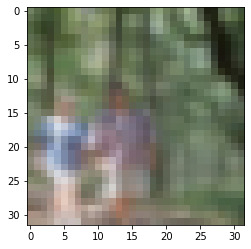

In [39]:
plt.imshow(x[1])

In [40]:
#output cua mo hinh co phan phoi xac suat cua cac nhan
predict_result = model.predict(np.array([x_test[1]]))
print(predict_result)

[[0.00027978 0.0005227  0.00342019 0.02022994 0.0248873  0.00454267
  0.00630656 0.03013443 0.01621271 0.00618531 0.00181642 0.00522713
  0.00253306 0.00542365 0.01231916 0.01161801 0.00461072 0.00089245
  0.02040426 0.00975709 0.0018307  0.0160674  0.00412673 0.00182725
  0.00770698 0.0045986  0.00636014 0.02480662 0.00740722 0.004705
  0.00361364 0.02451958 0.00620223 0.01834979 0.01108033 0.00279837
  0.00146259 0.00539329 0.05213885 0.01137822 0.00484287 0.00862871
  0.03249487 0.01277307 0.02437942 0.00496608 0.00598383 0.00098577
  0.00553547 0.00012919 0.01974002 0.00914556 0.00065031 0.00037352
  0.00105021 0.02660033 0.01142415 0.00167025 0.00091597 0.0044032
  0.00013028 0.00152623 0.00042688 0.01337051 0.01258606 0.01978058
  0.03577733 0.01396689 0.00257397 0.00158099 0.00042225 0.0003644
  0.01450445 0.0012371  0.06932541 0.00804865 0.00114576 0.01422502
  0.01496402 0.04088872 0.0362979  0.00691606 0.0007404  0.00086348
  0.00918218 0.00175166 0.00129186 0.00248895 0.0168

In [38]:
#nhan co gia tri xac saut cao nhat
np.argmax(predict_result)

42